# Iris Dataset



*   **The iris dataset contains 150 samples of iris flowers, each represented by four features: sepal length, sepal width, petal length, and petal width.**
*   **Sepal Length: Length of the sepal (in centimeters) from the base to the tip of the outermost petal.**

*   **Sepal Width: Width of the sepal (in centimeters) at its widest point**
*   **Petal Length: Length of the petal (in centimeters) from the base to the tip of the innermost petal.**

*   **Petal Width: Width of the petal (in centimeters) at its widest point.**
*   **The target variable is the species of the iris flower, which can take three possible values: setosa, versicolor, and virginica**

*   **The dataset is often used as a benchmark for testing classification algorithms and for studying patterns in data visualization and machine learning.**









In [33]:
import numpy as np                                              # import numpy library and give it an alias "np"
import pandas as pd                                             # import pandas library and give it an alias "pd"
from sklearn import tree                                        # import the tree module from scikit-learn library
from sklearn.model_selection import train_test_split            # import the train_test_split module from scikit-learn library
from sklearn.model_selection import GridSearchCV                # import the GridSearchCV module from scikit-learn library
from sklearn.metrics import accuracy_score, confusion_matrix    # import the accuracy_score and confusion_matrix modules from scikit-learn library


In [34]:
# Load the data from a CSV file
data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [35]:
# Check the number of missing values in the dataset
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [36]:
# Check the number of duplicate values in the dataset
data.duplicated().sum()

0

In [37]:
# Get the unique values in the `Species` column of the `data` DataFrame
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [38]:
# Replace the values in the 'Species' column of the `data` DataFrame with numeric values
data['Species'] = data['Species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0,1,2])

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [39]:
# Extract the feature values (X) and target variable (Y) from the `data` DataFrame
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

In [40]:
feature_list = ['Id',	'SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm'	,'PetalWidthCm']
feature_list

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [41]:
# Split the dataset into training and testing sets using the `train_test_split()` function from scikit-learn
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

In [42]:
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3],
    'criterion': ['gini', 'entropy']
}

In [43]:

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X, Y)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, min_samples_split=8),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6, 8]})

In [44]:
# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 6}
Best score:  0.9333333333333333


In [45]:
# Import the `DecisionTreeClassifier` class from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# Create a `DecisionTreeClassifier` object with hyperparameters
classifier = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=8)

# Train the `DecisionTreeClassifier` object on the training data
classifier.fit(x_train, y_train))

DecisionTreeClassifier(max_depth=3, min_samples_split=8)

[Text(0.4, 0.8333333333333334, 'PetalWidthCm <= 0.75\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.6, 0.5, 'Id <= 101.0\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

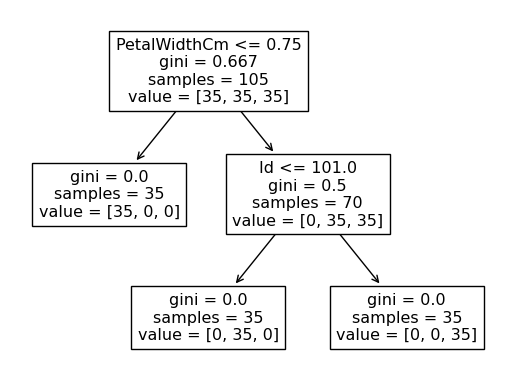

In [46]:
# Plot the decision tree using the `plot_tree()` function from scikit-learn
tree.plot_tree(classifier, feature_names=feature_list)

In [47]:
# Use the trained `DecisionTreeClassifier` object to make predictions on the test data
y_pred = classifier.predict(x_test)

# Compute the confusion matrix to evaluate the performance of the model on the test data
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix to the console
print(cm)

# Compute the accuracy of the model on the test data
accuracy_score(y_test, y_pred)

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


0.9777777777777777